In [14]:
%matplotlib widget

(2000,) (2000,)
Mean Squared Error: 0.002432848657049043


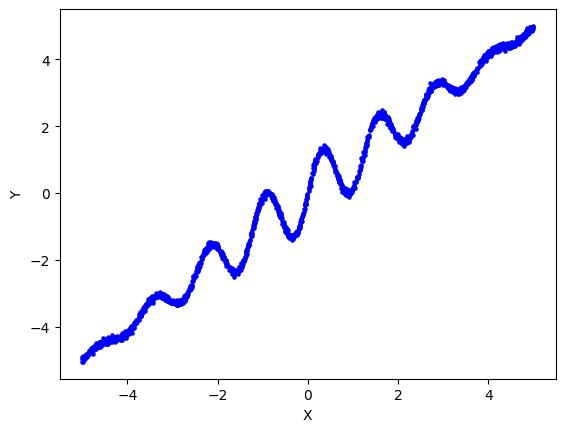

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(5 * x) * np.exp(-x**2/10) + x

def fc(x):
    return f(x) + np.random.normal(0, 0.05, x.shape)

X = np.random.uniform(-5, 5, 1000)
Y = fc(X)

print(np.shape(X), np.shape(Y))

Y_m = f(X)

mse = np.mean((Y - Y_m) ** 2)
print("Mean Squared Error:", mse)

plt.clf()
plt.scatter(X, Y, c='blue', s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
import tensorflow as tf
from keras import layers, models

tf.random.set_seed(42)

X = X.reshape(-1, 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(256, activation="relu"))

model.add(tf.keras.layers.Dense(1))


model.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

history = model.fit(X, Y, epochs=200, batch_size=32, verbose=1)




Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.1558 - mae: 1.3019
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1813 - mae: 0.3312
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1772 - mae: 0.3289
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1637 - mae: 0.3180
Epoch 5/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1466 - mae: 0.2999
Epoch 6/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1395 - mae: 0.2890
Epoch 7/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1384 - mae: 0.2859
Epoch 8/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1374 - mae: 0.2843
Epoch 9/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1354 - mae: 0.2823
Epoch 10/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1318 - mae: 0.2796
Epoch 11/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1241 - mae: 0.2723
Epoch 12/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1133 - mae: 0.2603
Epoch 13/200
63/63 ━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 


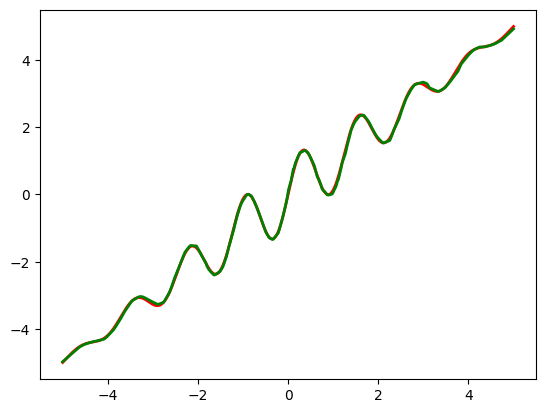

In [71]:
X_test = np.linspace(-5, 5, 1000)
Y_test = f(X_test)
Y_pred = model.predict(X_test)

plt.clf()
# plt.scatter(X, Y, c='blue', s=5)
plt.plot(X_test, Y_test, c='red', lw=2)
plt.plot(X_test, Y_pred, c='green', lw=2)
plt.show()

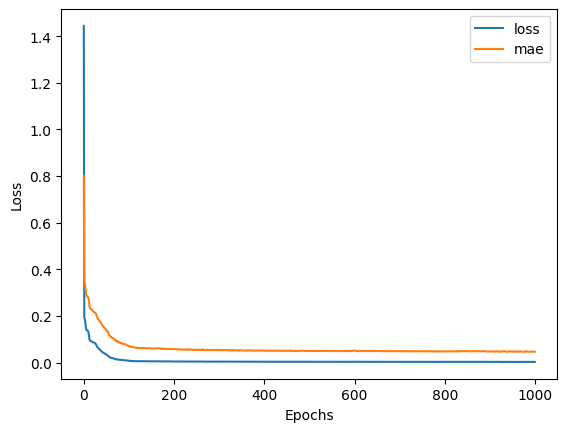

In [73]:
plt.clf()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()